In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy

In [10]:
samples = 100
np.random.seed(40)

In [11]:
mean_size = 2300
std_size = 500
size = np.round(np.random.normal(mean_size, std_size, samples),2)
price = size * 200 + np.random.normal(0, 20000, samples)

In [12]:
house_df = pd.DataFrame({
    "Size": size,
    "Price": price
})
house_df.head(10)

,Size,Price
0,1996.23,399931.801780
1,2236.93,430417.313783
2,1957.70,396916.627268
3,2764.36,518044.455965
4,1377.80,278089.859802
5,2066.50,410204.118075
6,3446.25,705388.817800
7,2544.41,491055.787311
8,2655.13,529734.864371
9,2827.77,562828.734102


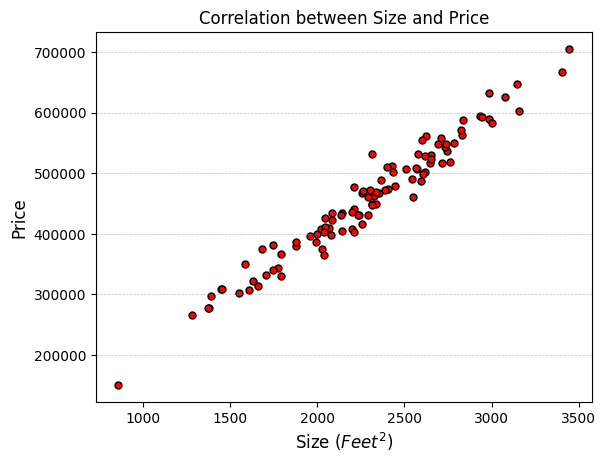

In [13]:
plt.scatter(house_df.Size, house_df.Price, s=25, facecolor='red', edgecolor='black',)
plt.title("Correlation between Size and Price")
plt.xlabel("Size ($Feet^2$)", fontsize='large')
plt.ylabel("Price", fontsize='large')
plt.grid(axis='y', linewidth=0.5, alpha=0.5, color='grey', linestyle='--')

Enter W and B in respect : 200 3000


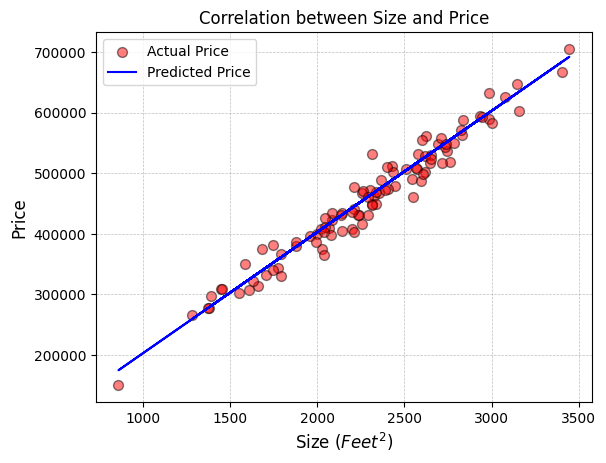

In [21]:
w, b = map(int,input("Enter W and B in respect :").split())
fit_straight_line = lambda x, w, b : x * w + b
plt.scatter(house_df.Size, house_df.Price, s=50, facecolor='red', edgecolor='black', alpha=0.5 ,label='Actual Price')
plt.plot(house_df.Size, fit_straight_line(house_df.Size, w, b), color='blue', label='Predicted Price')
plt.title("Correlation between Size and Price")
plt.xlabel("Size ($Feet^2$)", fontsize='large')
plt.ylabel("Price", fontsize='large')
plt.grid(axis='both', linewidth=0.5, alpha=0.5, color='grey', linestyle='--')
plt.legend()

In [15]:
def compute_output (x,w,b):
    """
    Args:
        x (ndarray (m,)) : feature values, m number of examples
        w,b (scalars): model paramters
    Returns:
        Y_hat (ndarray (m,)) : predictions for each feature variable
    """
    return w * x + b

In [16]:
def compute_cost (x,y,w,b):
    """
    Args:
        x (ndarray (m,)) : feature values, m number of examples
        y (ndarray (m,)) : Target values
        w,b (scalars): model paramters
    Returns:
        J_wb (Scalar): Cost, On average how far out predictions are from the target
    """
    m = y.shape[0]
    return np.sum(np.square(compute_output(x,w,b) - y)) * (1 / 2 * m)

In [28]:
def compute_gradient (x,y,w,b):
    """
    Args:
        x (ndarray (m,)) : feature values, m number of examples
        y (ndarray (m,)) : Target values
        w,b (scalars): model paramters
    Returns:
        dj_dw (scalar) : Derividive of Cost function J w.r.t. paramter w
        dj_db (scalar) : Derividive of Cost function J w.r.t. paramter b
    """
    m = y.shape[0]
    f_wb = compute_output(x,w,b)
    dj_dw = (1/m) * np.sum((f_wb - y) * x)
    dj_db = (1/m) * np.sum(f_wb - y)
    return dj_dw , dj_db

In [31]:
def gradient_descent (x, y, w_in, b_in, alpha, num_iter, cost_function, gradient_function, tolerance=1e-6):
    """
    Args:
        x (ndarray (m,)) Feature variable with m examples
        y (ndarray (m,)) Target variable
        w_in, b_in (scalar) : initialization of w, b
        alpha (float) : learning rate
        num_iter (int): number of iteration for gradient descent
        cost_function : squared error cost function
        gradient function : generate dj_dw, dj_db
    Returns:
        w, b (scalar): parameters after the gradient descent 
        J_history (list) : list of cost function history
        p_history (list) : list of (w,b) history
    """
    J_history = list()
    P_history = list()
    w = w_in
    b = b_in

    for i in range(num_iter):
        dj_dw , dj_db = gradient_function(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if (i < 100000):
            J_history.append(cost_function(x,y,w,b))
            P_history.append([w,b])

        if (i % math.ceil(num_iter / 100) == 0):
            print(f"Iteration {i:.5d} : Cost = {J_history[-1]:.3e} , 
            dj_dw = {dj_dw:.3e} , dj_db = {dj_db:.3e}, ")

SyntaxError: unterminated f-string literal (detected at line 31) (2267563559.py, line 31)